In [48]:
from importlib import reload
import time
import joblib
from pylab import *
from tqdm import tqdm


import sys
sys.path.append("../Mu-Helper/muhelper")
sys.path.append("..")

from helper_basic import *
import helper_basic as hp
import helper_finetime as hpt
import helper_visa as vs
import config
reload(config)



<module 'config' from '/home/mathusla/tofpet/Mu-Hardware/SystemCharacterization/../config.py'>

In [49]:
path_92 = config.scope + "fiber_attenuation_bcf92/"
path_xl = config.scope + "fiber_attenuation_bcf92xl/"

In [50]:
data_92 = joblib.load(path_92 + "attenuation_bcf92_data.joblib")
data_xl = joblib.load(path_xl + "attenuation_bcf92xl_data.joblib")

In [51]:
def decay_2x_single(x, l_slow, L0):
    # L0=610
    return  np.exp((L0-2*x)/l_slow)

def decay_2x_double(x, l_slow, l_fast, L0, alpha):
    a1=  alpha*np.exp((L0-2*x)/l_slow)      + (1-alpha)*np.exp((L0-2*x)/l_fast)
    return a1

def decay_2x_double_ratio(x, l_slow, l_fast, L0, alpha):
    # L0=610
    a1=  alpha*np.exp(-x/l_slow)      + (1-alpha)*np.exp(-x/l_fast)
    a2=  alpha*np.exp(-(L0-x)/l_slow) + (1-alpha)*np.exp(-(L0-x)/l_fast)
    return a1/a2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 630.0)

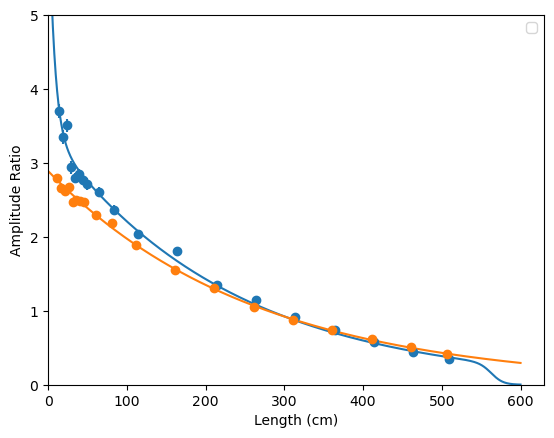

In [56]:
errorbar(data_92["x"], data_92["y"], yerr=data_92["yerr"], fmt="o")
popt_92, pcov_92, info_92, f_92 = hp.fit_curve(decay_2x_double_ratio,data_92["x"],data_92["y"], sigma=data_92["yerr"],
                                    p0=[30,520, 600,0.1],
                                    bounds=([0,300,100,0], [200,10000,1000,1]),
                                      maxfev=50000, makeplot=False,label="BCF92")

errorbar(data_xl["x"], data_xl["y"], yerr=data_xl["yerr"], fmt="o")
popt_xl, pcov_xl, info_xl, f_xl = hp.fit_curve(decay_2x_single,data_xl["x"],data_xl["y"], sigma=data_xl["yerr"],
                                    p0=[500, 600], maxfev=1000, makeplot=False,label="BCF92XL")

x_point = np.linspace(0,600,1000)
y_point_92 = decay_2x_double_ratio(x_point,*popt_92)
y_point_xl=decay_2x_single(x_point,*popt_xl)
cal_92 = decay_2x_double_ratio(np.array([100,500]), *popt_92)
cal_xl = decay_2x_single(np.array([100,500]), *popt_xl)
plot(x_point,y_point_92,color="C0")
plot(x_point,y_point_xl,color="C1")

xlabel("Length (cm)")
ylabel("Amplitude Ratio")
legend()
ylim(0,5)
xlim(0,)

In [61]:
scalefactor_92 = np.sqrt(1/(cal_92[0] * cal_92[1]))
scalefactor_xl = np.sqrt(1/(cal_xl[0] * cal_xl[1]))
print(scalefactor_92,scalefactor_xl)
print(average([scalefactor_xl,scalefactor_92]))

1.082080474628018 1.0836824587990022
1.08288146671351


In [62]:
data_92["y"] = data_92["y"] * 1.082080474628018
data_xl["y"] = data_xl["y"] * 1.0836824587990022

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[2.39262539 0.41837175]
[2.14059413 0.46716002]


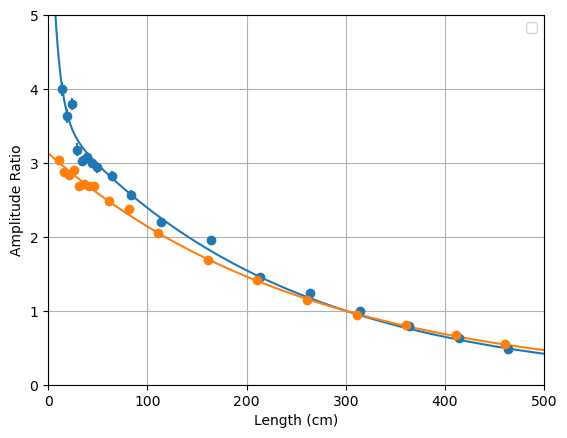

In [68]:
errorbar(data_92["x"], data_92["y"], yerr=data_92["yerr"], fmt="o")
popt_92, pcov_92, info_92, f_92 = hp.fit_curve(decay_2x_double_ratio,data_92["x"],data_92["y"], sigma=data_92["yerr"],
                                    p0=[30,520, 600,0.1],
                                    bounds=([0,300,100,0], [200,10000,1000,1]),
                                      maxfev=50000, makeplot=False,label="BCF92")

errorbar(data_xl["x"], data_xl["y"], yerr=data_xl["yerr"], fmt="o")
popt_xl, pcov_xl, info_xl, f_xl = hp.fit_curve(decay_2x_single,data_xl["x"],data_xl["y"], sigma=data_xl["yerr"],
                                    p0=[500, 600], maxfev=1000, makeplot=False,label="BCF92XL")

x_point = np.linspace(0,600,1000)
y_point_92 = decay_2x_double_ratio(x_point,*popt_92)
y_point_xl=decay_2x_single(x_point,*popt_xl)
cal_92 = decay_2x_double_ratio(np.array([100,500]), *popt_92)
print(cal_92)
cal_xl = decay_2x_single(np.array([100,500]), *popt_xl)
print(cal_xl)
plot(x_point,y_point_92,color="C0")
plot(x_point,y_point_xl,color="C1")

xlabel("Length (cm)")
ylabel("Amplitude Ratio")
legend()
ylim(0,5)
xlim(0,500)
grid()

In [66]:
1/2.14059413

0.46716002159643405

In [47]:
print(data_xl["x"])
print(data_xl["y"])

[ 11  16  21  26  31  36  41  46  61  81 111 161 211 261 311 361 411 461
 506]
[3.16555831 3.00376479 2.96247149 3.02661058 2.79936224 2.82856812
 2.80322403 2.79918133 2.59840538 2.47691496 2.13980823 1.76211475
 1.47371556 1.19332897 0.98875239 0.83752636 0.69525743 0.58021004
 0.4673343 ]
